## Logistic Regression

In [2]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import pymc3 as pm

Text(0, 0.5, 'logisitic(Z)')

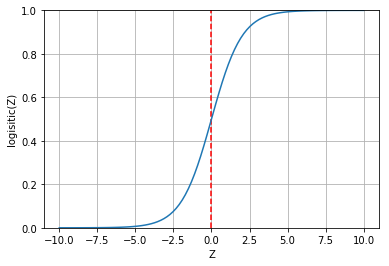

In [3]:
z = np.linspace(-10,10,100)
logistic = 1/(1+ np.exp(-z))
plt.plot(z, logistic)
plt.vlines(0,0,1, colors='r', linestyle='--')
plt.grid()
plt.ylim(0,1)
plt.xlabel('Z')
plt.ylabel('logisitic(Z)')

In [4]:
iris_df = sns.load_dataset('iris')
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


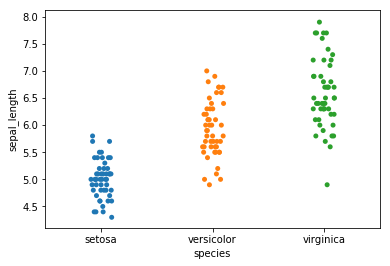

In [5]:
sns.stripplot(x='species', y='sepal_length', data=iris_df, jitter=True)

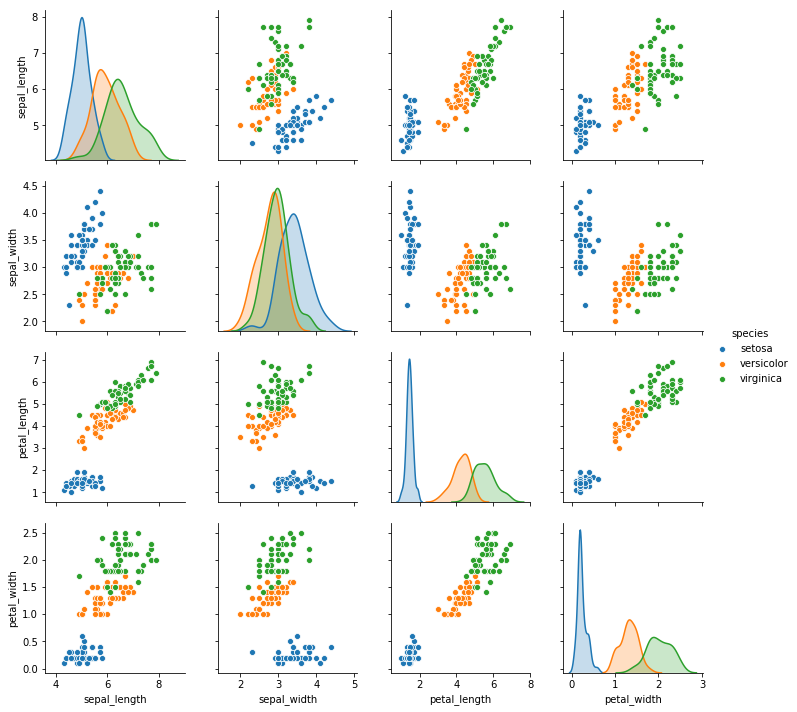

In [6]:
sns.pairplot(iris_df, hue='species', diag_kind='kde')

In [7]:
df = iris_df.query("species == ('setosa', 'versicolor')")
y_0 = pd.Categorical(df['species']).codes
x_n = 'sepal_length'
x_0 = df[x_n].values

/home/majeed/leraning/env3.6/lib/python3.6/site-packages/pymc3/tuning/starting.py:61: UserWarning: find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.
  warnings.warn('find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.')
logp = -41.726, ||grad|| = 3.5299e-05: 100%|██████████| 23/23 [00:00<00:00, 1994.97it/s]  
Sequential sampling (1 chains in 1 job)
NUTS: [beta, alpha]
100%|██████████| 5500/5500 [00:26<00:00, 205.42it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f38ec0ef898>,
      dtype=object)

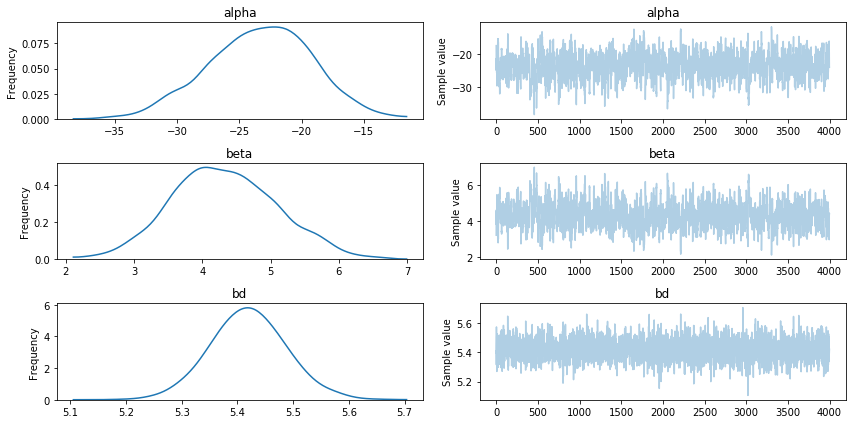

In [11]:
with pm.Model() as model_0:
    # priors
    alpha = pm.Normal('alpha', mu=0,sd=10)
    beta = pm.Normal('beta', mu=0, sd=10)
    
    mu = alpha + pm.math.dot(x_0, beta)
    theta = pm.Deterministic('theta', 1/(1+pm.math.exp(-mu))) #pm.math.sigmoid(mu)
    bd = pm.Deterministic('bd', -alpha/beta)
    y_1 = pm.Bernoulli('y_1', theta, observed=y_0)
    
    start = pm.find_MAP()
    step = pm.NUTS()
    trace_0 = pm.sample(5000, step, start, chains=1)

chain_0 = trace_0[1000:]
varnames = ['alpha', 'beta', 'bd']
pm.traceplot(chain_0, varnames)
    

In [12]:
pm.summary(chain_0, varnames)

,mean,sd,mc_error,hpd_2.5,hpd_97.5
alpha,-23.374981,4.116707,0.153646,-31.382498,-15.617691
beta,4.315002,0.762525,0.028553,2.925736,5.843391
bd,5.418079,0.067465,0.001242,5.290988,5.558145


Text(0, 0.5, '$\\theta$')

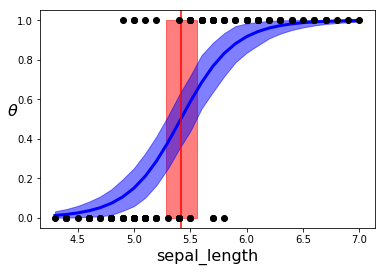

In [27]:
theta = trace_0['theta'].mean(axis=0)
idx = np.argsort(x_0)
plt.plot(x_0[idx], theta[idx],color='b', lw=3)
plt.axvline(trace_0['bd'].mean(),ymax=1, color='r')
bd_hpd = pm.hpd(trace_0['bd'])
plt.fill_between([bd_hpd[0], bd_hpd[1]],0,1, color='r', alpha=0.5)

plt.plot(x_0, y_0, 'o', color='k')
theta_hpd = pm.hpd(trace_0['theta'])[idx]
plt.fill_between(x_0[idx], theta_hpd[:,0], theta_hpd[:,1], color='b', alpha=0.5)

plt.xlabel(x_n, fontsize=16)
plt.ylabel(r'$\theta$', rotation=0, fontsize=16)

array([3, 2, 0, 1, 4])